In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/position-salaries-polynomial-linear-regression/position_salaries.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Training Linear Regression Model on whole dataset](#3)
4. [Training Polynomial Regression Model on whole dataset](#4)
5. [Visualizing Linear Regression Results](#5)
6. [Visualizing Polynomial Regression Results](#6)
7. [Visualizing Polynomial Regression Results - Smoother curve + Higher Resolution](#7)
8. [Predict - Linear Model](#8)
9. [Predict - Polynomial Model](#9)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#2. Data Preprocessing
##2.1 Fill Missing Data
from sklearn.impute import SimpleImputer

##2.2 Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

##2.3 Splitting Train and Test
from sklearn.model_selection import train_test_split

##2.4 Feature Scaling
from sklearn.preprocessing import StandardScaler

#3. Linear Regression
from sklearn.linear_model import LinearRegression

#4. Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="2"></a>
# 2. Importing Dataset
[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/position-salaries-polynomial-linear-regression/position_salaries.csv")
df.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [4]:
X = df.iloc[:,1:-1].values #0th column is redundant as we already have the encoding done in "Level"
y = df.iloc[:,-1].values

<a id="3"></a>
# 3. Training Linear Regression Model on whole dataset
[Go back to Index](#index)

In [5]:
lin_reg = LinearRegression() #y = b0 + b1*X1
lin_reg.fit(X, y) #we have used the entirety of X and y, without dividing them into train/test set

LinearRegression()

<a id="4"></a>
# 4. Training Polynomial Regression Model on whole dataset
[Go back to Index](#index)

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
#poly_reg = PolynomialFeatures(degree=2) #y = b0 + b1*X1 + b2*(X1 ^ 2)
poly_reg = PolynomialFeatures(degree=4) #y = b0 + b1*X1 + b2*(X1 ^ 2) + b3*(X1 ^ 3) + b4*(X1 ^ 4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression()

<a id="5"></a>
# 5. Visualizing Linear Regression Results
[Go back to Index](#index)

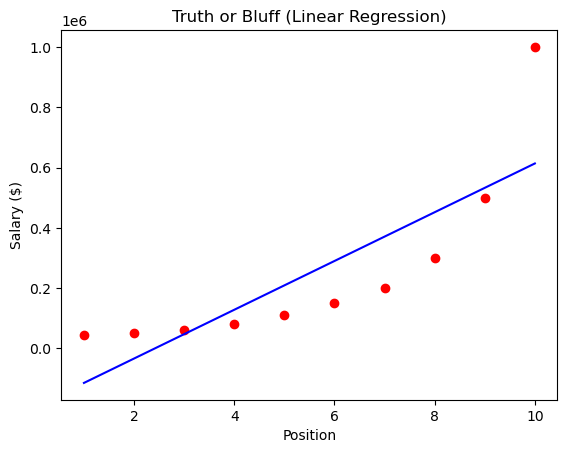

In [9]:
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position")
plt.ylabel("Salary ($)")

plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.show()

<a id="6"></a>
# 6. Visualizing Polynomial Regression Results
[Go back to Index](#index)

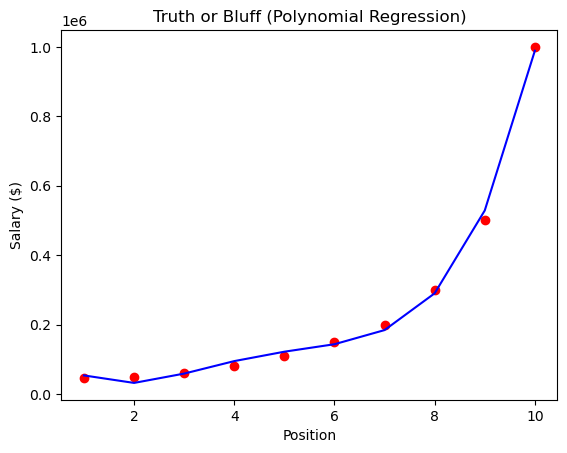

In [10]:
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary ($)")

plt.scatter(X, y, color="red")
plt.plot(X, lin_reg2.predict(X_poly), color="blue")
plt.show()

### Note:

This is also an example of `overfitting`

<a id="7"></a>
# 7. Visualizing Polynomial Regression Results - Higher Resolutions + Smoother Curve
[Go back to Index](#index)

In [11]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [12]:
X.shape

(10, 1)

In [13]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [14]:
X_grid.shape

(90,)

In [15]:
X_grid = X_grid.reshape((len(X_grid),1))
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

In [16]:
X_grid.shape

(90, 1)

In [17]:
X_poly2 = poly_reg.fit_transform(X_grid)
X_poly2

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00],
       [1.0000000e+00, 1.1000000e+00, 1.2100000e+00, 1.3310000e+00,
        1.4641000e+00],
       [1.0000000e+00, 1.2000000e+00, 1.4400000e+00, 1.7280000e+00,
        2.0736000e+00],
       [1.0000000e+00, 1.3000000e+00, 1.6900000e+00, 2.1970000e+00,
        2.8561000e+00],
       [1.0000000e+00, 1.4000000e+00, 1.9600000e+00, 2.7440000e+00,
        3.8416000e+00],
       [1.0000000e+00, 1.5000000e+00, 2.2500000e+00, 3.3750000e+00,
        5.0625000e+00],
       [1.0000000e+00, 1.6000000e+00, 2.5600000e+00, 4.0960000e+00,
        6.5536000e+00],
       [1.0000000e+00, 1.7000000e+00, 2.8900000e+00, 4.9130000e+00,
        8.3521000e+00],
       [1.0000000e+00, 1.8000000e+00, 3.2400000e+00, 5.8320000e+00,
        1.0497600e+01],
       [1.0000000e+00, 1.9000000e+00, 3.6100000e+00, 6.8590000e+00,
        1.3032100e+01],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
        1.60

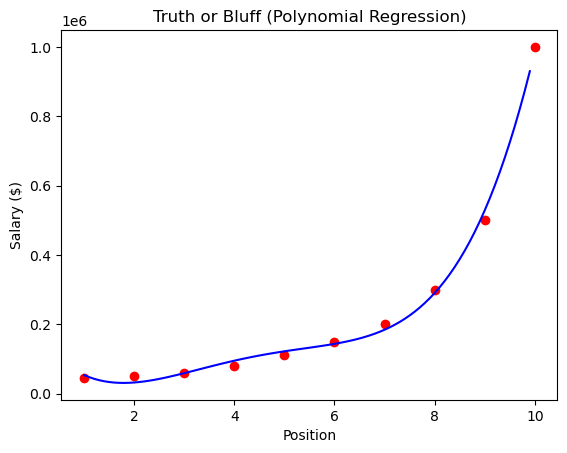

In [18]:
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary ($)")

plt.scatter(X, y, color="red")
plt.plot(X_grid, lin_reg2.predict(X_poly2), color="blue")
plt.show()

<a id="8"></a>
# 8. Predict - Linear Model 
[Go back to Index](#index)

In [19]:
lin_reg.predict([[6.5]])

array([330378.78787879])

<a id="9"></a>
# 9. Predict - Polynomial Model 
[Go back to Index](#index)

In [20]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])